epoch,train_loss,valid_loss,accuracy_multi,time
0,0.987747,0.711204,0.652988,00:57
1,0.792246,0.435817,0.871365,00:56
2,0.418549,0.222281,0.928219,00:58
3,0.279565,0.212967,0.928516,00:57


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.220692,0.215625,0.929289,01:00
1,0.210530,0.201317,0.932263,01:00
2,0.200990,0.199358,0.932501,00:59


✅ Model trained and saved as 'trained_model.pkl'


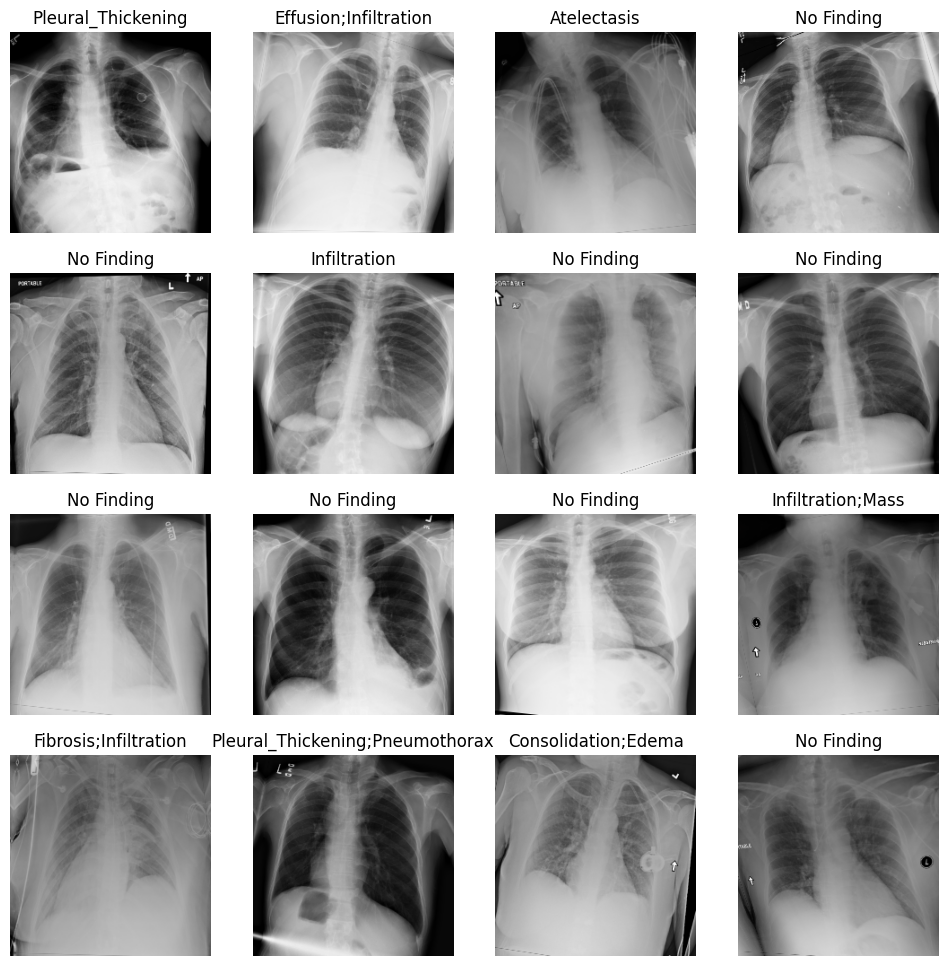

In [6]:
#  Install required libraries
!pip install numpy
!pip install pandas
!pip install fastai

#  Import libraries
from fastai.basics import *
from fastai.callback.all import *
from fastai.vision.all import *
import numpy as np
import pandas as pd

#  Set path and load dataset
path = Path('/kaggle/input/sample/sample')
df = pd.read_csv(path / "sample_labels.csv")

#  Define DataBlock for multi-label classification
def get_x(r): return path/'images'/r['Image Index']
def get_y(r): return r['Finding Labels'].split('|')

dblock = DataBlock(
    blocks=(ImageBlock, MultiCategoryBlock),
    get_x=get_x,
    get_y=get_y,
    splitter=RandomSplitter(),
    batch_tfms=[*aug_transforms(size=224), Normalize.from_stats(*imagenet_stats)]
)

#  Create DataLoaders
dls = dblock.dataloaders(df)
dls.show_batch(max_n=16)

#  Define and train the model
learn = vision_learner(dls, resnet50, metrics=partial(accuracy_multi, thresh=0.55))
learn.fine_tune(3, base_lr=3e-3, freeze_epochs=4)

#  Save the trained model as a pickle (.pkl) file
learn.export('trained_model.pkl')

print("✅ Model trained and saved as 'trained_model.pkl'")


In [7]:
from IPython.display import FileLink

# 🔗 Create a download link
FileLink(r'trained_model.pkl')


/kaggle/working/trained_model.pkl